# Logging the Temperature
The simplest way to get the internal Red Pitaya temperature is to use `monitor -ams` as described in the documentation
https://redpitaya.readthedocs.io/en/latest/appsFeatures/command_line_tools/com_line_tool.html#monitor-utility

The results of this can be parsed using the `split` command and selecting item 7.

In [1]:
from subprocess import run, PIPE
monitor_ams_output = run(["monitor","-ams"], stdout=PIPE).stdout
temp_value = float(monitor_ams_output.split(maxsplit=8)[7])

In [2]:
temp_value

70.625

Collect the temperature for a set number of minutes (by default 1).

In [3]:
import time
from IPython.display import display, clear_output

temp_list = [temp_value] #Store the values here
minutes = 1 # Time to record the temerature values
rate = 5 # Record every 15 seconds

t_end = time.time() + minutes * 60
timer = int(t_end-time.time())
recorded_this_step = False

while time.time() < t_end:
    monitor_ams_output = run(["monitor","-ams"], stdout=PIPE).stdout
    temp_value = float(monitor_ams_output.split(maxsplit=8)[7])
    #Add a temperature to the list every 15 seconds
    if (timer % rate==0 and recorded_this_step==False):
        temp_list.append(temp_value)
        recorded_this_step=True
    else:
        recorded_this_step = False
    
    clear_output(wait=True)
    display('Collecting temperatures. Time left: '+str(timer)+' Seconds. '+str(len(temp_list)) + ' value(s) recorded.')
    timer = int(t_end-time.time())
    time.sleep(0.5)
#temp_list.append(temp_value)

clear_output(wait=True)
display('Collecting temperature finished ' + str(len(temp_list)) + ' values recorded.')

'Collecting temperature finished 13 values recorded.'

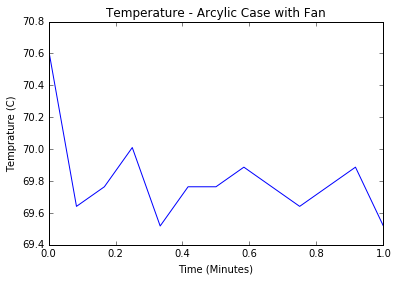

In [4]:
import matplotlib.pyplot as plt
import numpy as np

N = len(temp_list)
t_vec = np.append(np.arange(0,minutes,(rate/60)),minutes) # time vector for plotting

plt.plot(t_vec,temp_list)  # Plot some data on the (implicit) axes.
plt.xlabel('Time (Minutes)')
plt.ylabel('Temprature (C)')
plt.title("Temperature - Arcylic Case with Fan")
plt.show()

In [5]:
t_vec = np.append(np.arange(0,minutes+0.01,(rate/60)),minutes)
len(t_vec)

14

In [6]:
monitor_ams_output = run(["monitor","-ams"], stdout=PIPE).stdout
temp_value = float(monitor_ams_output.split(maxsplit=8)[7])
temp_list = np.append(temp_list,temp_value)
len(temp_list)

14

In [7]:
temp_list

array([ 70.625,  69.641,  69.764,  70.01 ,  69.518,  69.764,  69.764,
        69.887,  69.764,  69.641,  69.764,  69.887,  69.518,  70.625])